# Project 4: Retail Analysis with Walmart Data
### From Vivek Gautam 
#### Submitted in July 2020


**DESCRIPTION :**
<br>One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.
<br>Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.
<br><br>**Dataset Description**
<br>This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:
<br>Store - the store number
<br>Date - the week of sales
<br>Weekly_Sales -  sales for the given store
<br>Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
<br>Temperature - Temperature on the day of sale
<br>Fuel_Price - Cost of fuel in the region
<br>CPI – Prevailing consumer price index
<br>Unemployment - Prevailing unemployment rate
<br><br>**Holiday Events**
<br>Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
<br>Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
<br>Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
<br>Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
### Analysis Tasks
<br><br>**A. Basic Statistics tasks**
<br>1. Which store has maximum sales
<br>2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
<br>3. Which store/s has good quarterly growth rate in Q3’2012
<br>4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
<br>5. Provide a monthly and semester view of sales in units and give insights
<br><br>**B. Statistical Model**
<br>For Store 1 – Build  prediction models to forecast demand
<br>1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
<br>2. Change dates into days by creating new variable.

<br>Select the model which gives best accuracy.


In [ ]:
# Preliminary Steps
# a. Data Ingestion
# b. Data Understanding
# c. Missing Value check and imputation
# d. Feature Creation/Derived Variable Creation

In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data into a DataFrame
data = pd.read_csv('data/Walmart_Store_sales.csv')
print(data.shape)
data.head()

(6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
colnames = data.columns.values 
print(colnames)

['Store' 'Date' 'Weekly_Sales' 'Holiday_Flag' 'Temperature' 'Fuel_Price'
 'CPI' 'Unemployment']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.index

RangeIndex(start=0, stop=6435, step=1)

In [9]:
# Finding how many weeks of data each store have
data.groupby('Store')['Store'].count()

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Store, dtype: int64

In [10]:
dt=pd.date_range('2010-02-05' , '2012-11-01')
dt

DatetimeIndex(['2010-02-05', '2010-02-06', '2010-02-07', '2010-02-08',
               '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12',
               '2010-02-13', '2010-02-14',
               ...
               '2012-10-23', '2012-10-24', '2012-10-25', '2012-10-26',
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01'],
              dtype='datetime64[ns]', length=1001, freq='D')

In [11]:
# Converting values from Date column into DateTime format and adding it to the DataFrame as New_Date variable
data['New_Date']=pd.to_datetime(data['Date'],format='%d-%m-%Y')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05


In [12]:
#data.New_Date.dtype
data.dtypes['New_Date']

dtype('<M8[ns]')

### 1. Which store has maximum sales 

In [13]:
# Finding sum of sales for each store
sol1_df=pd.DataFrame(data.groupby('Store')['Weekly_Sales'].sum())
print(sol1_df.shape)
sol1_df.head()

(45, 1)


,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07


In [14]:
sol1_df['StoreNum']=sol1_df.index
sol1_df.index=range(45)
sol1_df.head()

,Weekly_Sales,StoreNum
0,2.224028e+08,1
1,2.753824e+08,2
2,5.758674e+07,3
3,2.995440e+08,4
4,4.547569e+07,5


In [15]:
# Index number of store having maximum sale
data.groupby('Store')['Weekly_Sales'].sum().argmax()

19

In [16]:
# Finding maximum value of Weekly Sales
sol1_df.iloc[np.argmax(sol1_df['Weekly_Sales']),:]

Weekly_Sales    3.013978e+08
StoreNum        2.000000e+01
Name: 19, dtype: float64

In [17]:
sol1_df.sort_values('Weekly_Sales',ascending=False).head()

,Weekly_Sales,StoreNum
19,3.013978e+08,20
3,2.995440e+08,4
13,2.889999e+08,14
12,2.865177e+08,13
1,2.753824e+08,2


In [18]:
#Final Answer of store having maximum sales
sol1_df.sort_values('Weekly_Sales',ascending =False).iloc[[0]]

,Weekly_Sales,StoreNum
19,3.013978e+08,20


#### Store number 20 has maximum Weekly_Sales as 3.013978e+08

### 2. Which store has maximum standard deviation i.e., the sales vary a lot. 

In [19]:
# Finding Standard Deviation of Weekly_Sales for each store
sol2_df=pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std())
print(sol2_df.shape)
sol2_df.head()

(45, 1)


,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745


In [20]:
sol2_df['StoreNum']=sol2_df.index
sol2_df.index=range(45)
sol2_df.head()

,Weekly_Sales,StoreNum
0,155980.767761,1
1,237683.694682,2
2,46319.631557,3
3,266201.442297,4
4,37737.965745,5


In [21]:
# Index number of store having maximum SD
data.groupby('Store')['Weekly_Sales'].std().argmax()

13

In [22]:
# Finding maximum value of SD of Weekly Sales
sol2_df.iloc[np.argmax(sol2_df['Weekly_Sales']),:]

Weekly_Sales    317569.949476
StoreNum            14.000000
Name: 13, dtype: float64

In [23]:
sol2_df.sort_values('Weekly_Sales',ascending=False).head()

,Weekly_Sales,StoreNum
13,317569.949476,14
9,302262.062504,10
19,275900.562742,20
3,266201.442297,4
12,265506.995776,13


In [24]:
#Final Answer of store having maximum SD
sol2_df.sort_values('Weekly_Sales',ascending =False).iloc[[0]]

,Weekly_Sales,StoreNum
13,317569.949476,14


#### Store number 14 has maximum Standard Deviation as 317569.949476

### Find out the coefficient of mean to standard deviation 

In [25]:
# Step 1: Divide the standard deviation by the mean
data.groupby(['Store']).std()/data.groupby(['Store']).mean()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,0.100292,3.659735,0.208625,0.132718,0.020143,0.050424
2,0.123424,3.659735,0.227112,0.132718,0.020136,0.080722
3,0.115021,3.659735,0.177028,0.132718,0.020211,0.062317
4,0.127083,3.659735,0.259906,0.129615,0.014441,0.238280
5,0.118668,3.659735,0.204946,0.132718,0.020155,0.061539
6,0.135823,3.659735,0.202967,0.132718,0.020175,0.080086
7,0.197305,3.659735,0.417041,0.132659,0.016543,0.050020
8,0.116953,3.659735,0.256340,0.132718,0.020212,0.059545
9,0.126895,3.659735,0.230383,0.132718,0.020216,0.075917


In [26]:
# Step 2: Multiply Step 1 by 100:
(data.groupby(['Store']).std()/data.groupby(['Store']).mean())*100

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,10.029212,365.973523,20.862476,13.271814,2.014330,5.042414
2,12.342388,365.973523,22.711217,13.271814,2.013615,8.072226
3,11.502141,365.973523,17.702797,13.271814,2.021150,6.231652
4,12.708254,365.973523,25.990603,12.961463,1.444129,23.828008
5,11.866844,365.973523,20.494630,13.271814,2.015486,6.153930
6,13.582286,365.973523,20.296698,13.271814,2.017480,8.008622
7,19.730469,365.973523,41.704142,13.265886,1.654304,5.001974
8,11.695283,365.973523,25.634023,13.271814,2.021244,5.954519
9,12.689547,365.973523,23.038349,13.271814,2.021615,7.591675


##### there is coefficient mean of every store

### 3. Which store/s has good quarterly growth rate in Q3’2012

In [27]:
# Finding quarter value for each row 
data['Qtr']=pd.PeriodIndex(data['New_Date'],freq='q').astype(str)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date,Qtr
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1


In [28]:
# Finding rows of 2012Q2 and 2012Q3
qtrs=['2012Q2','2012Q3']
sol3_df=data[data.Qtr.isin(qtrs)]
print(sol3_df.shape)
sol3_df.head()

(1170, 10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date,Qtr
113,1,06-04-2012,1899676.88,0,70.43,3.891,221.435611,7.143,2012-04-06,2012Q2
114,1,13-04-2012,1621031.70,0,69.07,3.891,221.510210,7.143,2012-04-13,2012Q2
115,1,20-04-2012,1521577.87,0,66.76,3.877,221.564074,7.143,2012-04-20,2012Q2
116,1,27-04-2012,1468928.37,0,67.23,3.814,221.617937,7.143,2012-04-27,2012Q2
117,1,04-05-2012,1684519.99,0,75.55,3.749,221.671800,7.143,2012-05-04,2012Q2


In [29]:
# Finding sum of Weekly_Sales by grouping Store and Qtr values
sol3_df_1=pd.DataFrame(sol3_df.groupby(['Store','Qtr'])['Weekly_Sales'].sum())
sol3_df_1.reset_index(inplace=True) 
print(sol3_df_1.shape)
sol3_df_1.head()

(90, 3)


,Store,Qtr,Weekly_Sales
0,1,2012Q2,20978760.12
1,1,2012Q3,20253947.78
2,2,2012Q2,25083604.88
3,2,2012Q3,24303354.86
4,3,2012Q2,5620316.49


In [32]:
# Reshaping the data frame from long to wide format
sol3_df_2=sol3_df_1.pivot(index='Store', columns='Qtr', values='Weekly_Sales')
print(sol3_df_2.shape)
sol3_df_2.head()

(45, 2)


Qtr,2012Q2,2012Q3
Store,,
1,20978760.12,20253947.78
2,25083604.88,24303354.86
3,5620316.49,5298005.47
4,28454363.67,27796792.46
5,4466363.69,4163790.99


In [33]:
# Compute the difference b/w these 2 quarters and then calculate the % growth
# Formula used is (( Q3 - Q2 ) / Q2) * 100
sol3_df_2['Growth_Rate_In_Q3_2012_%'] = ((sol3_df_2['2012Q3'] - sol3_df_2['2012Q2']) / sol3_df_2['2012Q2']) * 100
sol3_df_2.head(20)

Qtr,2012Q2,2012Q3,Growth_Rate_In_Q3_2012_%
Store,,,
1,20978760.12,20253947.78,-3.454982
2,25083604.88,24303354.86,-3.110598
3,5620316.49,5298005.47,-5.734749
4,28454363.67,27796792.46,-2.310968
5,4466363.69,4163790.99,-6.774475
6,20833909.92,20167312.24,-3.199580
7,7290859.27,8262787.39,13.330776
8,11919630.95,11748952.70,-1.431909
9,7484935.11,7022149.56,-6.182893


### 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together 

In [ ]:
# Step 1. Subset the data for Non Holidays & holidays
# Step 2. Avg sales for Non-Hol for each store[Overall level - optional]
# Step 3. Join the data created at step#2 to holiday data at Step#1
# Step 4 use criteria (> Avg Sales) to select/filters those rows

In [35]:
# Find sum of holiday sales
sol4_df1 = pd.DataFrame(data[data.Holiday_Flag==1].groupby(['New_Date'],as_index=False)['Weekly_Sales'].sum())
print(sol4_df1.shape)
sol4_df1

(10, 2)


,New_Date,Weekly_Sales
0,2010-02-12,48336677.63
1,2010-09-10,45634397.84
2,2010-11-26,65821003.24
3,2010-12-31,40432519.00
4,2011-02-11,47336192.79
5,2011-09-09,46763227.53
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-02-10,50009407.92
9,2012-09-07,48330059.31


In [36]:
# Find mean of non-holiday sales
sol4_df2 = pd.DataFrame(data[data.Holiday_Flag==0].groupby(['New_Date'],as_index=False)['Weekly_Sales'].mean())
print(sol4_df2.shape)
sol4_df2.head()

(133, 2)


,New_Date,Weekly_Sales
0,2010-02-05,1.105572e+06
1,2010-02-19,1.072822e+06
2,2010-02-26,9.770794e+05
3,2010-03-05,1.041588e+06
4,2010-03-12,1.020564e+06


In [37]:
# Find mean of non-holiday sales and show in DataFrame sol4_df1 by adding new column
sol4_df1["Mean_of_non_holiday_sales"] = data[data.Holiday_Flag==0].Weekly_Sales.mean()
sol4_df1

,New_Date,Weekly_Sales,Mean_of_non_holiday_sales
0,2010-02-12,48336677.63,1.041256e+06
1,2010-09-10,45634397.84,1.041256e+06
2,2010-11-26,65821003.24,1.041256e+06
3,2010-12-31,40432519.00,1.041256e+06
4,2011-02-11,47336192.79,1.041256e+06
5,2011-09-09,46763227.53,1.041256e+06
6,2011-11-25,66593605.26,1.041256e+06
7,2011-12-30,46042461.04,1.041256e+06
8,2012-02-10,50009407.92,1.041256e+06
9,2012-09-07,48330059.31,1.041256e+06


In [38]:
# Following holidays have higher sales than the mean sales in non-holiday season for all stores together
sol4_df1[sol4_df1.Weekly_Sales > sol4_df1.Mean_of_non_holiday_sales]

,New_Date,Weekly_Sales,Mean_of_non_holiday_sales
0,2010-02-12,48336677.63,1.041256e+06
1,2010-09-10,45634397.84,1.041256e+06
2,2010-11-26,65821003.24,1.041256e+06
3,2010-12-31,40432519.00,1.041256e+06
4,2011-02-11,47336192.79,1.041256e+06
5,2011-09-09,46763227.53,1.041256e+06
6,2011-11-25,66593605.26,1.041256e+06
7,2011-12-30,46042461.04,1.041256e+06
8,2012-02-10,50009407.92,1.041256e+06
9,2012-09-07,48330059.31,1.041256e+06


##### It seems that all holidays have higher sales than the mean sales in non-holiday season for all stores together

### 5. Provide a monthly and semester view of sales in units and give insights 

In [ ]:
# 5. Provide a monthly and semester view of sales in units and give insights 
# Step 1. Extract Months and Semester (6 months)
#### I have done Below steps at an Overlall as well as Store Level ######
# Step 2. Group by data at month and year level and compite sum of sales
# Step 3. Plot a bar/line chart for each month and year
# Step 4. Group by months and get average
# Step 5. Then plot avregae sales by month using a line/bar plot

### Monthly view of sales in units and it's insights

In [39]:
# Finding quarter value for each row 
data['Month_Year']=pd.PeriodIndex(data['New_Date'],freq='m').astype(str)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date,Qtr,Month_Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1,2010-02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1,2010-02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1,2010-02
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1,2010-02
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1,2010-03


In [40]:
# Finding sum of Weekly_Sales by grouping Store and Month values
sol5_df1=pd.DataFrame(data.groupby(['Store','Month_Year'])['Weekly_Sales'].sum())
sol5_df1.columns = ['Monthly_Sales']
sol5_df1.reset_index(inplace=True) 
print(sol5_df1.shape)
sol5_df1.head()

(1485, 3)


,Store,Month_Year,Monthly_Sales
0,1,2010-02,6307344.10
1,1,2010-03,5871293.98
2,1,2010-04,7422801.92
3,1,2010-05,5929938.64
4,1,2010-06,6084081.46


##### Sum of values from variable Weekly_Sales by grouping Store and Month values provides 1485 records

In [41]:
# Finding sum of Weekly_Sales by grouping Month values
sol5_df2=pd.DataFrame(data.groupby(['Month_Year'])['Weekly_Sales'].sum())
sol5_df2.columns = ['Monthly_Sales']
sol5_df2.reset_index(inplace=True) 
print(sol5_df2.shape)
sol5_df2.head()

(33, 2)


,Month_Year,Monthly_Sales
0,2010-02,1.903330e+08
1,2010-03,1.819198e+08
2,2010-04,2.314124e+08
3,2010-05,1.867109e+08
4,2010-06,1.922462e+08


##### Sum of values from variable Weekly_Sales by grouping Store and Month values provides 33 records

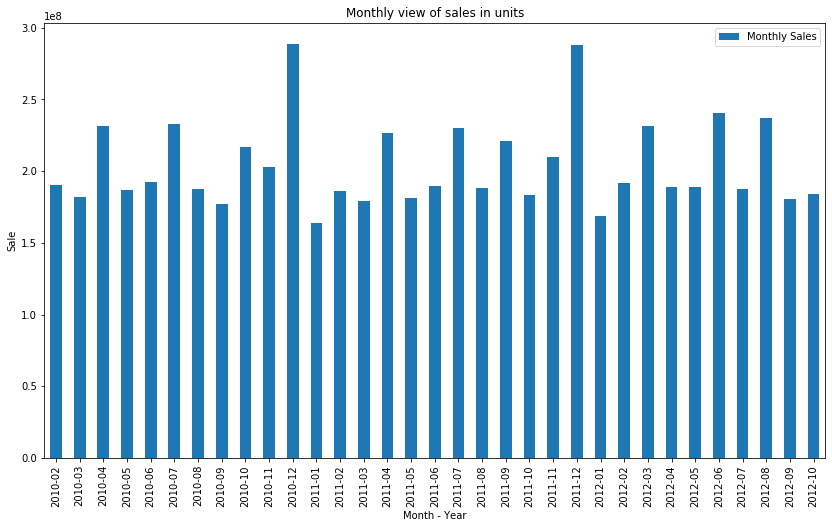

In [42]:
# Plotting Bar Chart for Monthly Sales
sol5_df2.plot(kind='bar', x='Month_Year', y='Monthly_Sales', label='Monthly Sales', figsize=(14, 8))
plt.ylabel("Sale")
plt.xlabel("Month - Year")
plt.title('Monthly view of sales in units')
plt.legend()

In [ ]:
?plt.legend

In [ ]:
?plt.plot

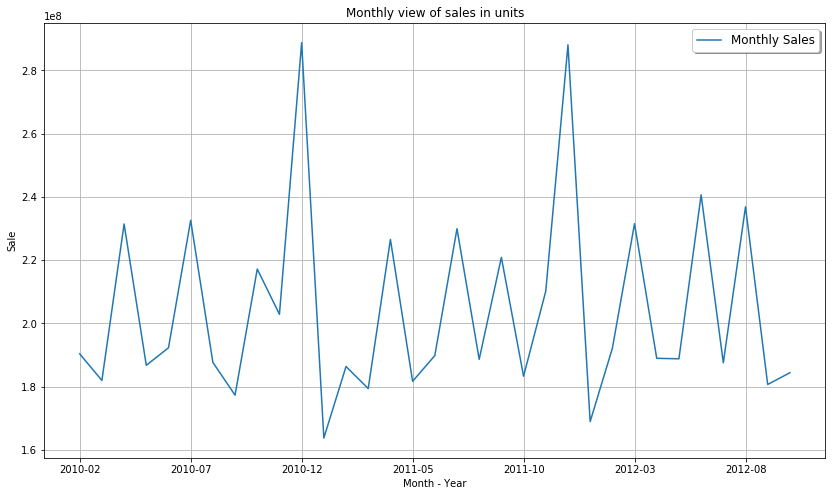

In [43]:
# Plotting Line Chart for Monthly Sales

#sol5_df2.plot.line(x ='Month_Year', y='Monthly_Sales', label= 'Monthly Sales')
#plt.plot(sol5_df2.Month_Year,sol5_df2.Monthly_Sales, 'go-', linewidth=1, label= 'Monthly Sales')
sol5_df2.plot(kind='line', x='Month_Year', y='Monthly_Sales', label='Monthly Sales', figsize=(14, 8))
plt.xlabel('Month - Year')
plt.ylabel('Sale')
plt.title('Monthly view of sales in units')
plt.grid()
plt.legend(loc='upper right', fontsize="large", shadow=True)

##### Month 2010-12 has highest sale and 2011-01 has lowest sale than other months

### Semester view of sales in units and it's insights

In [44]:
# Applying conditions to find Semesters for each year
data.loc[(data['Qtr'] == '2010Q1') | (data['Qtr'] == '2010Q2'), 'Semester'] = '2010S1'  
data.loc[(data['Qtr'] == '2010Q3') | (data['Qtr'] == '2010Q4'), 'Semester'] = '2010S2' 
data.loc[(data['Qtr'] == '2011Q1') | (data['Qtr'] == '2011Q2'), 'Semester'] = '2011S1'  
data.loc[(data['Qtr'] == '2011Q3') | (data['Qtr'] == '2011Q4'), 'Semester'] = '2011S2' 
data.loc[(data['Qtr'] == '2012Q1') | (data['Qtr'] == '2012Q2'), 'Semester'] = '2012S1'
data.loc[(data['Qtr'] == '2012Q3') | (data['Qtr'] == '2012Q4'), 'Semester'] = '2012S2' 
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date,Qtr,Month_Year,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1,2010-02,2010S1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1,2010-02,2010S1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1,2010-02,2010S1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1,2010-02,2010S1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1,2010-03,2010S1


In [47]:
# Finding sum of Weekly_Sales by grouping Semester values
sol5_df3=pd.DataFrame(data.groupby(['Store','Semester'])['Weekly_Sales'].sum())
sol5_df3.columns = ['Sem_Sales']
sol5_df3.reset_index(inplace=True) 
print(sol5_df3.shape)
sol5_df3.head()

(270, 3)


,Store,Semester,Sem_Sales
0,1,2010S1,31615460.10
1,1,2010S2,41663371.90
2,1,2011S1,38199841.16
3,1,2011S2,42722077.67
4,1,2012S1,41702522.95


##### Sum of Weekly_Sales by grouping Store and Semester values provides 270 records

In [48]:
# Finding sum of Weekly_Sales by grouping Year values
sol5_df4=pd.DataFrame(data.groupby(['Semester'])['Weekly_Sales'].sum())
sol5_df4.columns = ['Sem_Sales']
sol5_df4.reset_index(inplace=True) 
sol5_df4

,Semester,Sem_Sales
0,2010S1,9.826223e+08
1,2010S2,1.306264e+09
2,2011S1,1.127340e+09
3,2011S2,1.320860e+09
4,2012S1,1.210765e+09
5,2012S2,7.893674e+08


##### sum of Weekly_Sales by grouping Store and Month values provides 6 records

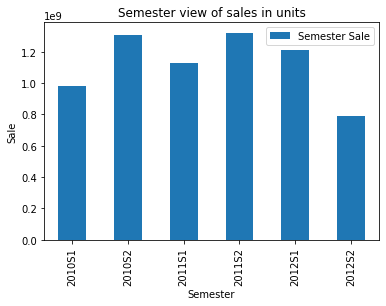

In [49]:
# Plotting Bar Chart for Semester Sales
sol5_df4.plot(x ='Semester', y='Sem_Sales', kind = 'bar', label='Semester Sale')
plt.ylabel("Sale")
plt.xlabel("Semester")
plt.title('Semester view of sales in units')
plt.legend()

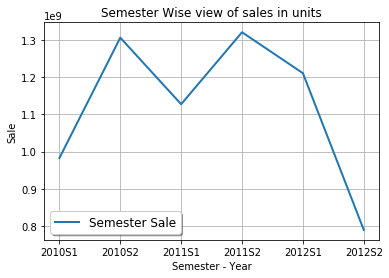

In [50]:
# Plotting Line Chart for Semester Sales
plt.plot(sol5_df4.Semester,sol5_df4.Sem_Sales,linewidth=2, label='Semester Sale')
plt.xlabel('Semester - Year')
plt.ylabel('Sale')
plt.title('Semester Wise view of sales in units')
plt.legend(loc='lower left', fontsize="large",shadow=True)
plt.grid()

##### It seems that Semester 2 of the year 2011 has highest sale and Semester 2 of 2012 has lowest sales than other semesters

## Linear Regression Model Pipeline - Add more features and improve the accuracy

In [ ]:
# B. Statistical Model - For Store 1 – Build prediction models to forecast demand 
# 1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. 
# 2. Change dates into days by creating new variable.

In [51]:
# Creating DataFrame having data from Store 1
store1_df=data[data['Store']==1]
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date,Qtr,Month_Year,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1,2010-02,2010S1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1,2010-02,2010S1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1,2010-02,2010S1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1,2010-02,2010S1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1,2010-03,2010S1


In [52]:
print(store1_df.shape)
print(store1_df.columns)

(143, 12)
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'New_Date', 'Qtr', 'Month_Year',
       'Semester'],
      dtype='object')


In [53]:
# Sorting store1_df based column New_Date in ascending order
store1_df.sort_values(by=['New_Date'], inplace=True)
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date,Qtr,Month_Year,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1,2010-02,2010S1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1,2010-02,2010S1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1,2010-02,2010S1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1,2010-02,2010S1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1,2010-03,2010S1


In [55]:
# restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order) by adding new variable Date_ID
store1_df['Week_No'] = range(1, 144)
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date,Qtr,Month_Year,Semester,Week_No
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1,2010-02,2010S1,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1,2010-02,2010S1,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1,2010-02,2010S1,3
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1,2010-02,2010S1,4
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1,2010-03,2010S1,5


### Applying Linear Regression by using variable Week_No

In [56]:
features1=store1_df[['Week_No','Weekly_Sales']]
features1.head()

,Week_No,Weekly_Sales
0,1,1643690.90
1,2,1641957.44
2,3,1611968.17
3,4,1409727.59
4,5,1554806.68


In [57]:
train, test = train_test_split(features1, test_size=0.25, random_state=39)

In [58]:
# Building model on Train Data
lm1_train = smf.ols(formula='Weekly_Sales ~ Week_No' , data=train).fit()
lm1_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.413
Date:                Thu, 23 Jul 2020   Prob (F-statistic):             0.0219
Time:                        23:25:52   Log-Likelihood:                -1422.5
No. Observations:                 107   AIC:                             2849.
Df Residuals:                     105   BIC:                             2854.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.492e+06   2.85e+04     52.337      0.000    1.44e+06    1.55e+06
Week_No      803.0671    345.183      2.326      0.022     118.634    1487.500
==============================================================================
Omnibus:                       54.410   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.813
Skew:                           1.817   Prob(JB):                     1.48e-39
Kurtosis:                       8.186   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Applying Model on Test Data
lm1_test = smf.ols(formula='Weekly_Sales ~ Week_No ' , data=test).fit()
lm1_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.418
Date:                Thu, 23 Jul 2020   Prob (F-statistic):              0.242
Time:                        23:25:54   Log-Likelihood:                -485.23
No. Observations:                  36   AIC:                             974.5
Df Residuals:                      34   BIC:                             977.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.512e+06   5.78e+04     26.170      0.000    1.39e+06    1.63e+06
Week_No      817.5649    686.496      1.191      0.242    -577.563    2212.693
==============================================================================
Omnibus:                       50.514   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.905
Skew:                           3.051   Prob(JB):                     6.18e-67
Kurtosis:                      15.885   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##### 

In [61]:
Week_No_New = pd.DataFrame({'Week_No': [store1_df.Week_No.min(), store1_df.Week_No.max()]})
Week_No_New.head()

,Week_No
0,1
1,143


In [62]:
preds1 = lm1_train.predict(Week_No_New)
preds1

0    1.492995e+06
1    1.607030e+06
dtype: float64

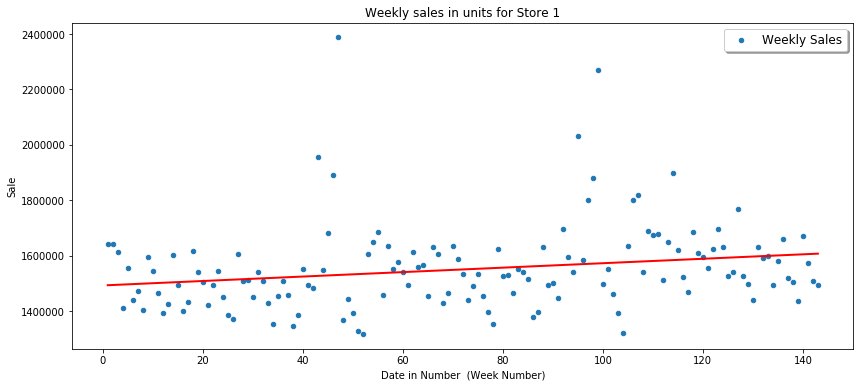

In [63]:
# Plotting Scatter Plot for Weekly Sales for Store 1
store1_df.plot(kind='scatter', x='Week_No', y='Weekly_Sales', label='Weekly Sales', figsize=(14, 6))
plt.plot(Week_No_New, preds1, c='red', linewidth=2)
plt.xlabel('Date in Number  (Week Number)')
plt.ylabel('Sale')
plt.title('Weekly sales in units for Store 1')
plt.legend(loc='upper right', fontsize="large",shadow=True)

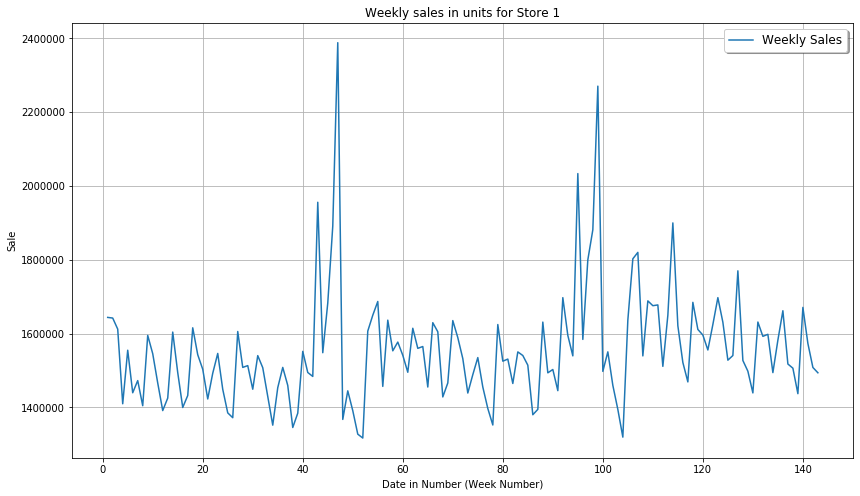

In [64]:
# Plotting Line Chart for Weekly Sales for Store 1
#plt.plot(store1_df.Date_ID,store1_df.Weekly_Sales,linewidth=2, label='Semester Sale')
store1_df.plot(kind='line', x='Week_No', y='Weekly_Sales', label='Weekly Sales', figsize=(14, 8))
plt.xlabel('Date in Number (Week Number)')
plt.ylabel('Sale')
plt.title('Weekly sales in units for Store 1')
plt.legend(loc='upper right', fontsize="large",shadow=True)
plt.grid()

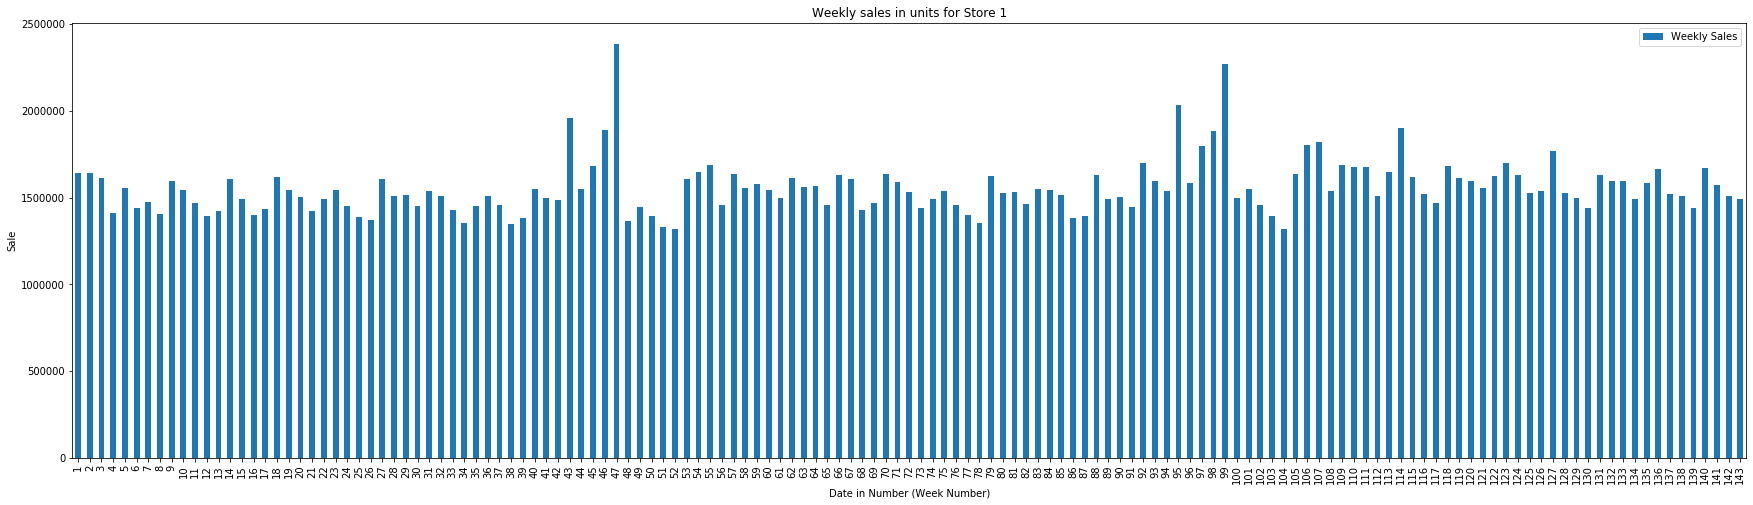

In [65]:
# Plotting Bar Chart for Monthly Sales
store1_df.plot(kind='bar', x='Week_No', y='Weekly_Sales', label='Weekly Sales', figsize=(30, 8))
plt.ylabel("Sale")
plt.xlabel('Date in Number (Week Number)')
plt.title('Weekly sales in units for Store 1')
plt.legend()

##### It seems that Week 47 of the Store 1 has highest sale and Week 52 of Store 1 has lowest sales than other Weeks

In [67]:
# To confirm whether Week 47 has highest sale or not
print(store1_df['Weekly_Sales'].max())
max_df = pd.DataFrame(store1_df.loc[store1_df['Weekly_Sales'] == 2387950.2])
max_df[['Week_No', 'Weekly_Sales']]

2387950.2


,Week_No,Weekly_Sales
46,47,2387950.2


##### From above, it get confirmed that Week 47 has highest sale as as 2387950.2 units

In [68]:
# To confirm whether Week 52 has lowest sale or not
print(store1_df['Weekly_Sales'].min())
min_df = pd.DataFrame(store1_df.loc[store1_df['Weekly_Sales'] == 1316899.31])
min_df[['Week_No', 'Weekly_Sales']]

1316899.31


,Week_No,Weekly_Sales
51,52,1316899.31


##### From above it get confirmed that Week 52 has lowest sale as 1316899.31 units

In [ ]:
# Storing Features i.e. dependent variables
#features=strore1_df[['Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment']]
#features.head()

In [ ]:
# Creating independent variable
# y=strore1_df[['Weekly_Sales']]

### To Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [69]:
# Creating features to build a Linear Regression Model
features=store1_df[['Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment','Weekly_Sales']]
features.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,38.51,2.548,211.242170,8.106,1641957.44
2,0,39.93,2.514,211.289143,8.106,1611968.17
3,0,46.63,2.561,211.319643,8.106,1409727.59
4,0,46.50,2.625,211.350143,8.106,1554806.68


In [70]:
# Creating Train and Test data
train, test = train_test_split(features, test_size=0.2, random_state=39)

In [ ]:
# Building model on Train Data using variables Temperature, Holiday_Flag, CPI, Unemployment and Fuel_Price

In [71]:
lm2_train = smf.ols(formula='Weekly_Sales ~ Temperature + Holiday_Flag + Fuel_Price + CPI +  Unemployment' , data=train).fit()
lm2_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     5.592
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           0.000127
Time:                        23:26:59   Log-Likelihood:                -1502.9
No. Observations:                 114   AIC:                             3018.
Df Residuals:                     108   BIC:                             3034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.206e+06   1.78e+06     -1.240      0.218   -5.73e+06    1.32e+06
Temperature  -2582.6024    971.702     -2.658      0.009   -4508.685    -656.520
Holiday_Flag  9.712e+04   5.06e+04      1.921      0.057   -3107.707    1.97e+05
Fuel_Price   -1.488e+04   4.71e+04     -0.316      0.752   -1.08e+05    7.84e+04
CPI           1.602e+04   6877.873      2.329      0.022    2383.676    2.96e+04
Unemployment  6.727e+04   5.87e+04      1.147      0.254    -4.9e+04    1.84e+05
==============================================================================
Omnibus:                       38.329   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.017
Skew:                           1.238   Prob(JB):                     7.03e-23
Kurtosis:                       6.917   Cond. No.                     3.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### From above summary, I observed that p-value of Fuel_Price is highest i.e. 0.752 which is greater than 0.05, so I can say that Fuel_Price doesn't have any impact on Sale <br/> Now I will find summary of model again by removing a column Fuel_Price from model

In [ ]:
# Building model on Train Data using variables Temperature, Holiday_Flag, CPI and Unemployment

In [72]:
lm3_train = smf.ols(formula='Weekly_Sales ~ Temperature + Holiday_Flag + CPI + Unemployment' , data=train).fit()
lm3_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     7.023
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           4.55e-05
Time:                        23:27:04   Log-Likelihood:                -1503.0
No. Observations:                 114   AIC:                             3016.
Df Residuals:                     109   BIC:                             3030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.875e+06   1.43e+06     -1.308      0.194   -4.72e+06    9.66e+05
Temperature  -2678.8356    919.001     -2.915      0.004   -4500.266    -857.405
Holiday_Flag  9.916e+04   4.99e+04      1.985      0.050     166.977    1.98e+05
CPI           1.451e+04   4947.700      2.933      0.004    4706.604    2.43e+04
Unemployment    6.1e+04    5.5e+04      1.110      0.270    -4.8e+04     1.7e+05
==============================================================================
Omnibus:                       39.467   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.172
Skew:                           1.260   Prob(JB):                     1.97e-24
Kurtosis:                       7.078   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### p-value for Unemployment is 0.270 which is greater than 0.05, so I will remove Unemployment column from model and check summary again

In [ ]:
# Building model on Train Data using variables Temperature, Holiday_Flag and CPI

In [73]:
lm4_train = smf.ols(formula='Weekly_Sales ~ Temperature + Holiday_Flag + CPI ' , data=train).fit()
lm4_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     8.935
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           2.39e-05
Time:                        23:27:07   Log-Likelihood:                -1503.6
No. Observations:                 114   AIC:                             3015.
Df Residuals:                     110   BIC:                             3026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.474e+05   6.32e+05     -0.707      0.481    -1.7e+06    8.06e+05
Temperature  -2779.9958    915.429     -3.037      0.003   -4594.161    -965.831
Holiday_Flag  1.064e+05   4.96e+04      2.148      0.034    8220.541    2.05e+05
CPI           1.009e+04   2930.164      3.442      0.001    4279.643    1.59e+04
==============================================================================
Omnibus:                       43.875   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.782
Skew:                           1.350   Prob(JB):                     4.43e-31
Kurtosis:                       7.705   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Now, from above summary, it seems that the CPI variable is significant to the above model as it has imact on sales with coefficient value 1.009e+04 units when used with a variable Temperature.

In [ ]:
# Visualize impact of CPI, Unemployment and Fuel_Price on Weekly_Sales using Scatter Plot

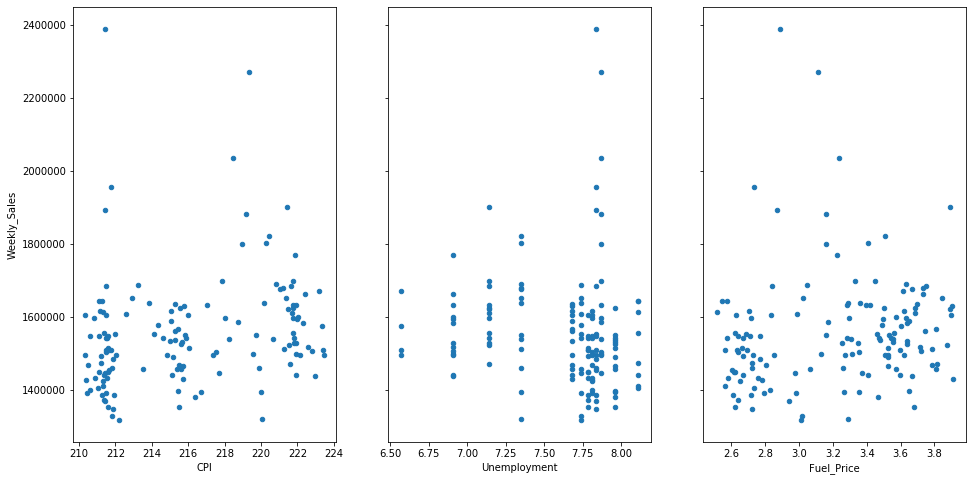

In [74]:
fig, axs = plt.subplots(1, 3, sharey=True)
store1_df.plot(kind='scatter', x='CPI', y='Weekly_Sales', ax=axs[0], figsize=(16, 8))
store1_df.plot(kind='scatter', x='Unemployment', y='Weekly_Sales', ax=axs[1])
store1_df.plot(kind='scatter', x='Fuel_Price', y='Weekly_Sales', ax=axs[2])

In [ ]:
# Building model on Train Data using variable CPI

In [75]:
lm5_train = smf.ols(formula='Weekly_Sales ~ CPI ', data=train).fit()
lm5_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     8.224
Date:                Thu, 23 Jul 2020   Prob (F-statistic):            0.00494
Time:                        23:27:22   Log-Likelihood:                -1512.0
No. Observations:                 114   AIC:                             3028.
Df Residuals:                     112   BIC:                             3033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.787e+05   6.72e+05     -0.563      0.574   -1.71e+06    9.54e+05
CPI         8922.9658   3111.536      2.868      0.005    2757.857    1.51e+04
==============================================================================
Omnibus:                       60.112   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.928
Skew:                           1.891   Prob(JB):                     7.85e-48
Kurtosis:                       8.600   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
CPI_New = pd.DataFrame({'CPI': [store1_df.CPI.min(), store1_df.CPI.max()]})
CPI_New.head()

,CPI
0,210.337426
1,223.444251


In [77]:
preds5 = lm5_train.predict(CPI_New)
preds5

0    1.498149e+06
1    1.615101e+06
dtype: float64

In [ ]:
# Building model on Train Data using variable Unemployment

In [78]:
lm6_train = smf.ols(formula='Weekly_Sales ~ Unemployment ' , data=train).fit()
lm6_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.587
Date:                Thu, 23 Jul 2020   Prob (F-statistic):              0.210
Time:                        23:27:32   Log-Likelihood:                -1515.2
No. Observations:                 114   AIC:                             3034.
Df Residuals:                     112   BIC:                             3040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.886e+06   2.68e+05      7.038      0.000    1.36e+06    2.42e+06
Unemployment -4.425e+04   3.51e+04     -1.260      0.210   -1.14e+05    2.53e+04
==============================================================================
Omnibus:                       62.625   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.928
Skew:                           1.938   Prob(JB):                     2.40e-54
Kurtosis:                       9.079   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
Unemployment_New = pd.DataFrame({'Unemployment': [store1_df.Unemployment.min(), store1_df.Unemployment.max()]})
Unemployment_New.head()

,Unemployment
0,6.573
1,8.106


In [80]:
preds6 = lm6_train.predict(Unemployment_New)
preds6

0    1.595476e+06
1    1.527644e+06
dtype: float64

In [ ]:
# Building model on Train Data using variable Fuel_Price

In [81]:
lm7_train = smf.ols(formula='Weekly_Sales ~ Fuel_Price ' , data=train).fit()
lm7_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.720
Date:                Thu, 23 Jul 2020   Prob (F-statistic):              0.192
Time:                        23:27:41   Log-Likelihood:                -1515.2
No. Observations:                 114   AIC:                             3034.
Df Residuals:                     112   BIC:                             3040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.414e+06   1.04e+05     13.575      0.000    1.21e+06    1.62e+06
Fuel_Price   4.19e+04    3.2e+04      1.311      0.192   -2.14e+04    1.05e+05
==============================================================================
Omnibus:                       61.542   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.042
Skew:                           1.914   Prob(JB):                     9.15e-52
Kurtosis:                       8.901   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
Fuel_Price_New = pd.DataFrame({'Fuel_Price': [store1_df.Fuel_Price.min(), store1_df.Fuel_Price.max()]})
Fuel_Price_New.head()

,Fuel_Price
0,2.514
1,3.907


In [83]:
preds7 = lm7_train.predict(Fuel_Price_New)
preds7

0    1.519025e+06
1    1.577389e+06
dtype: float64

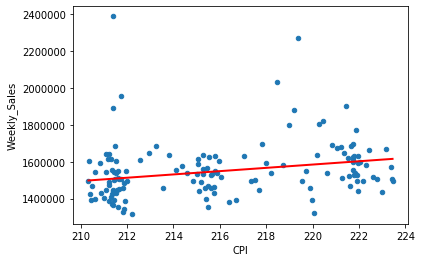

In [84]:
# Visualize impact of CPI on Weekly_Sales using Scatter Plot
store1_df.plot(kind='scatter', x='CPI', y='Weekly_Sales')
plt.plot(CPI_New, preds5, c='red', linewidth=2)

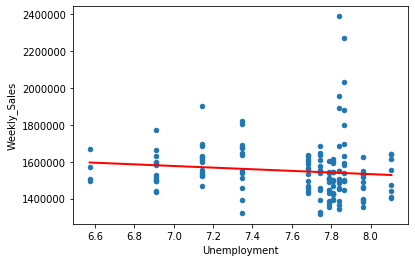

In [85]:
# Visualize impact of Unemployment on Weekly_Sales using Scatter Plot
store1_df.plot(kind='scatter', x='Unemployment', y='Weekly_Sales')
plt.plot(Unemployment_New, preds6, c='red', linewidth=2)

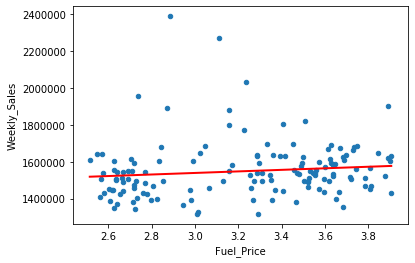

In [86]:
# Visualize impact of Fuel_Price on Weekly_Sales using Scatter Plot
store1_df.plot(kind='scatter', x='Fuel_Price', y='Weekly_Sales')
plt.plot(Fuel_Price_New, preds7, c='red', linewidth=2)

In [ ]:
# Now, Checking Correlation value between CPI and Weekly_Sales, Unemployment and Weekly_Sales,Fuel_Price and Weekly_Sales  

In [87]:
print ('Corr b/w CPI and Weekly_Sales :',np.corrcoef(store1_df.CPI,store1_df.Weekly_Sales)[0])
print ('Corr b/w Unemployment and Weekly_Sales',np.corrcoef(store1_df.Unemployment,store1_df.Weekly_Sales)[0])
print ('Corr b/w Fuel_Price and Weekly_Sales',np.corrcoef(store1_df.Fuel_Price,store1_df.Weekly_Sales)[0])

Corr b/w CPI and Weekly_Sales : [1.         0.22540766]
Corr b/w Unemployment and Weekly_Sales [ 1.         -0.09795539]
Corr b/w Fuel_Price and Weekly_Sales [1.         0.12459158]


##### From above summary, it seems that the CPI variable is significant to the above model as it has good impact on sales with Correlation coefficient value 0.22540766 units.
##### Now, I will apply this model on Test data to check the result

In [ ]:
# Applying model on Test Data using variable CPI

In [88]:
lm5_test = smf.ols(formula='Weekly_Sales ~ CPI ', data=test).fit()
lm5_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.5500
Date:                Thu, 23 Jul 2020   Prob (F-statistic):              0.465
Time:                        23:28:15   Log-Likelihood:                -393.53
No. Observations:                  29   AIC:                             791.1
Df Residuals:                      27   BIC:                             793.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.459e+05   1.66e+06      0.208      0.837   -3.07e+06    3.76e+06
CPI         5716.4912   7708.007      0.742      0.465   -1.01e+04    2.15e+04
==============================================================================
Omnibus:                       41.750   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.275
Skew:                           2.817   Prob(JB):                     1.06e-37
Kurtosis:                      13.449   Cond. No.                     9.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The Linear Regression Model built on CPI variable is giving good result with best accuracy after applying on Test data too.

In [92]:
# Visualize impact of CPI on Weekly_Sales using Scatter Plot
store1_df.plot(kind='scatter', x=test$x, y=test$y)
plt.plot(CPI_New, preds5, c='red', linewidth=2)

SyntaxError: invalid syntax (<ipython-input-92-cc522ee32f5e>, line 2)

### Change dates into days by creating new variable.

In [89]:
# Change dates into days by creating new variable
data['Day_Of_Week'] = data['New_Date'].dt.day_name()
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Date,Qtr,Month_Year,Semester,Day_Of_Week
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1,2010-02,2010S1,Friday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1,2010-02,2010S1,Friday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1,2010-02,2010S1,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1,2010-02,2010S1,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1,2010-03,2010S1,Friday


In [90]:
# Finding Unique values from variable Day_Of_Week
#data.Day_Of_Week.unique() 
print(data['Day_Of_Week'].unique())

['Friday']


##### After retrieving unique values from variable Day_Of_Week, it seems that Every week starts on Friday

# -------------------------------------- End of the Project -----------------------------------------

In [ ]:
########## If we were to build Linear Regression for all the stores then there could have been 3 diff approaches ##########
###Approach 1 : Create separate models for each of the store and store the prediction in a data frame - Use For Loop
###Approach 2 : Using one hot encoding or dummy variable creation, add indicators for all the 45 stores - 44 indicators (0/1)
###Approach 3 : Use clustering to segment the stores with similar sales behavior and then build linear regression model for each of the cluster

##### Recommended  Approach : Is to build individual models for each of the stores.As each stores will have it own sales pattern